In [1]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import os
import matplotlib.pyplot as plt
import random
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from catboost import CatBoostClassifier


random.seed(0)

# https://mjeensung.github.io/characterbigramtfidf/

# Load data
drive.mount('/content/gdrive', force_remount=True)
data_dir = '../content/gdrive/MyDrive/544/data'

data_path = os.path.join(data_dir, "preprocessed_data.csv")

# Load dataset
with open(os.path.join(data_dir, "X_train.npy"), 'rb') as f:
    X_train = np.load(f)
with open(os.path.join(data_dir, "X_val.npy"), 'rb') as f:
    X_val = np.load(f)
with open(os.path.join(data_dir, "X_test.npy"), 'rb') as f:
    X_test = np.load(f)

y_train = pd.read_csv(os.path.join(data_dir, "y_train.csv"))
y_val = pd.read_csv(os.path.join(data_dir, "y_val.csv"))
y_test = pd.read_csv(os.path.join(data_dir, "y_test.csv"))

Mounted at /content/gdrive


In [3]:
# Train/val/test = 75/35/40

In [4]:
X_train.shape

(3750, 2500)

In [5]:
y_train = np.ravel(y_train)
y_train.shape

(3750,)

In [6]:
model = CatBoostClassifier(learning_rate = 0.9, iterations=75)
model.fit(X_train, y_train)

0:	learn: 3.8638267	total: 3.92s	remaining: 4m 50s
1:	learn: 3.7741951	total: 8.41s	remaining: 5m 6s
2:	learn: 3.6328386	total: 14.7s	remaining: 5m 51s
3:	learn: 3.5215239	total: 21.2s	remaining: 6m 15s
4:	learn: 3.4428280	total: 26.1s	remaining: 6m 4s
5:	learn: 3.3344573	total: 29.7s	remaining: 5m 41s
6:	learn: 3.3017276	total: 33.3s	remaining: 5m 23s
7:	learn: 3.2358200	total: 37s	remaining: 5m 9s
8:	learn: 3.1788575	total: 40.5s	remaining: 4m 57s
9:	learn: 3.1039010	total: 44.2s	remaining: 4m 47s
10:	learn: 3.0420910	total: 49.3s	remaining: 4m 47s
11:	learn: 2.9954657	total: 53s	remaining: 4m 38s
12:	learn: 2.8765898	total: 56.6s	remaining: 4m 29s
13:	learn: 2.8376593	total: 1m	remaining: 4m 22s
14:	learn: 2.8112471	total: 1m 3s	remaining: 4m 15s
15:	learn: 2.7925747	total: 1m 7s	remaining: 4m 8s
16:	learn: 2.7731025	total: 1m 10s	remaining: 4m 2s
17:	learn: 2.7664104	total: 1m 16s	remaining: 4m 1s
18:	learn: 2.7327071	total: 1m 19s	remaining: 3m 54s
19:	learn: 2.7212908	total: 1m 2

In [7]:
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
y_pred_test = model.predict(X_test)

In [8]:
y_train.shape

(3750,)

In [9]:
print(f"Accuracy on training set: {metrics.accuracy_score(y_train, y_pred_train):.3f}")
print(f"Accuracy on val set: {metrics.accuracy_score(y_val, y_pred_val):.3f}")
print(f"Accuracy on test set: {metrics.accuracy_score(y_test, y_pred_test):.3f}")

print(f"F1 score on val set: {metrics.f1_score(y_val, y_pred_val, average = 'macro'):.3f}")
print(f"F1 score on test set: {metrics.f1_score(y_test, y_pred_test, average = 'macro'):.3f}\n")

Accuracy on training set: 0.465
Accuracy on val set: 0.226
Accuracy on test set: 0.247
F1 score on val set: 0.225
F1 score on test set: 0.242



In [10]:
print("Classification report for the validation set")
print(classification_report(y_val, y_pred_val))

Classification report for the validation set
                 precision    recall  f1-score   support

     Broooooke_       0.16      0.20      0.18        35
      DarkPiano       0.24      0.26      0.25        35
         Djalfy       0.21      0.14      0.17        35
        Dogbook       0.72      0.83      0.77        35
  DonniesGirl69       0.62      0.29      0.39        35
    Dutchrudder       0.50      0.43      0.46        35
 JBnVFCLover786       0.05      0.03      0.04        35
      Jayme1988       0.07      0.06      0.06        35
   JessMcFlyxxx       0.38      0.34      0.36        35
    Karen230683       0.14      0.29      0.19        35
MTVnHollyWEST23       0.68      0.37      0.48        35
 MiDesfileNegro       0.05      0.06      0.05        35
          Quimo       0.16      0.20      0.18        35
SallytheShizzle       0.14      0.11      0.12        35
   SongoftheOss       0.25      0.06      0.09        35
     Spidersamm       0.18      0.20      

In [11]:
print("Classification report for the test set")
print(classification_report(y_test, y_pred_test))

Classification report for the test set
                 precision    recall  f1-score   support

     Broooooke_       0.21      0.25      0.23        20
      DarkPiano       0.10      0.10      0.10        20
         Djalfy       0.10      0.05      0.07        20
        Dogbook       0.63      0.85      0.72        20
  DonniesGirl69       0.54      0.35      0.42        20
    Dutchrudder       0.59      0.50      0.54        20
 JBnVFCLover786       0.29      0.20      0.24        20
      Jayme1988       0.09      0.05      0.06        20
   JessMcFlyxxx       0.69      0.55      0.61        20
    Karen230683       0.00      0.00      0.00        20
MTVnHollyWEST23       0.29      0.20      0.24        20
 MiDesfileNegro       0.00      0.00      0.00        20
          Quimo       0.29      0.25      0.27        20
SallytheShizzle       0.17      0.20      0.19        20
   SongoftheOss       0.19      0.15      0.17        20
     Spidersamm       0.35      0.40      0.37  

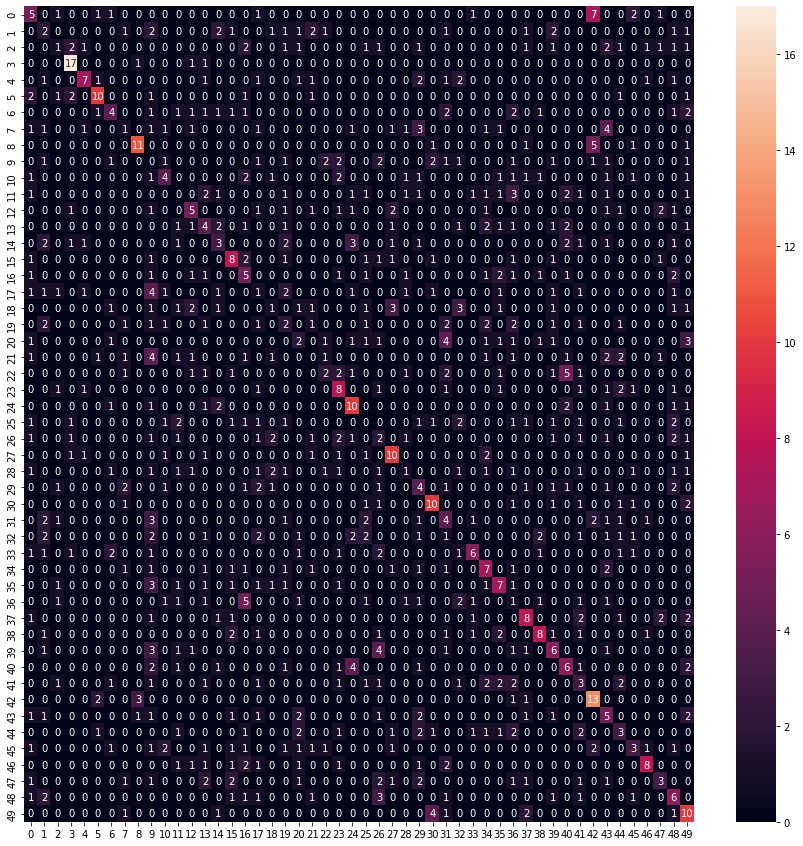

In [12]:
mat = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (15,15))
sns.heatmap(mat, annot=True)
